In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from utils import plot_2d, plot_classifier_boundary, test_model

ImportError: cannot import name 'test_model' from 'utils' (/Users/macbookair/Desktop/UPorto/ML/project/ML_Assignment/utils.py)

# RBF performing better

In [2]:
def G_SVC_RBF():
    
    X, y = datasets.make_circles(n_samples=(1000), noise=0.1, factor=0.7)
    
    return X, y

In [3]:
X_rbf, y_rbf = G_SVC_RBF()

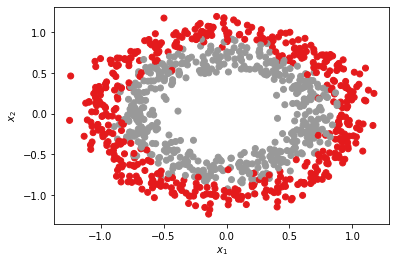

In [4]:
plot_2d(X_rbf, y_rbf)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_rbf, y_rbf, test_size=.33)
model_rbf = SVC(kernel='rbf', random_state=42).fit(X_train, y_train)
model_poly = SVC(kernel='poly', random_state=42).fit(X_train, y_train)

In [6]:
print(model_rbf.score(X_test, y_test) * 100)
print(model_poly.score(X_test, y_test) * 100)

93.03030303030303
47.57575757575758


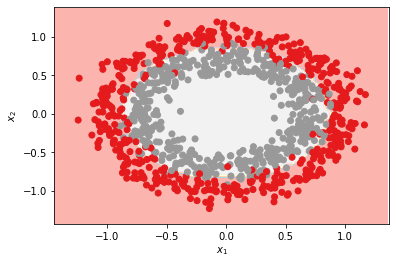

In [7]:
plot_classifier_boundary(model_rbf, X_rbf, y_rbf)

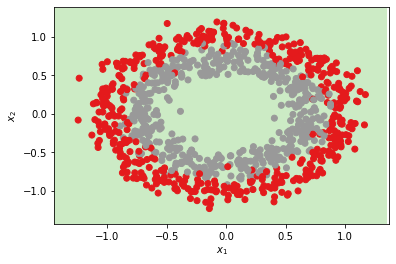

In [8]:



plot_classifier_boundary(model_poly, X_rbf, y_rbf)

# POLY performing better